In [ ]:
import pandas as pd 

In [ ]:
# df=pd.read_csv("../../data/eco2mix_data.csv")
df=pd.read_csv("../../data/eco2mix-national-tr.csv",sep=";")
df

,Périmètre,Nature,Date,Heure,Date - Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),...,Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW),Stockage batterie (MW),Déstockage batterie (MW)
0,France,Données temps réel,2025-02-22,02:00,2025-02-22T02:00:00+01:00,48377.0,48900,49200.0,111.0,0.0,...,137.0,0.0,3513.0,856.0,0.0,327.0,351.0,303.0,-4.0,0.0
1,France,Données temps réel,2025-02-22,02:15,2025-02-22T02:15:00+01:00,48573.0,48150,48500.0,110.0,0.0,...,141.0,0.0,3434.0,869.0,0.0,327.0,353.0,303.0,-20.0,0.0
2,France,Données temps réel,2025-02-22,02:30,2025-02-22T02:30:00+01:00,47344.0,47400,47800.0,110.0,0.0,...,137.0,0.0,3443.0,849.0,0.0,328.0,356.0,303.0,-18.0,0.0
3,France,Données temps réel,2025-02-22,03:00,2025-02-22T03:00:00+01:00,46148.0,46100,46500.0,107.0,0.0,...,144.0,0.0,3445.0,797.0,46.0,328.0,357.0,303.0,-18.0,0.0
4,France,Données temps réel,2025-02-22,04:15,2025-02-22T04:15:00+01:00,43554.0,43800,43900.0,107.0,0.0,...,141.0,0.0,3441.0,805.0,0.0,328.0,363.0,303.0,0.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30139,France,Données temps réel,2025-11-10,21:45,2025-11-10T21:45:00+01:00,NaN,51950,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30140,France,Données temps réel,2025-11-10,22:30,2025-11-10T22:30:00+01:00,NaN,51900,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30141,France,Données temps réel,2025-11-10,23:00,2025-11-10T23:00:00+01:00,NaN,53000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30142,France,Données temps réel,2025-11-10,23:15,2025-11-10T23:15:00+01:00,NaN,52800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30144 entries, 0 to 30143
Data columns (total 41 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Périmètre                                  30144 non-null  object 
 1   Nature                                     30144 non-null  object 
 2   Date                                       30144 non-null  object 
 3   Heure                                      30144 non-null  object 
 4   Date - Heure                               30144 non-null  object 
 5   Consommation (MW)                          30036 non-null  float64
 6   Prévision J-1 (MW)                         30144 non-null  int64  
 7   Prévision J (MW)                           30048 non-null  float64
 8   Fioul (MW)                                 30031 non-null  float64
 9   Charbon (MW)                               30031 non-null  float64
 10  Gaz (MW)              

In [ ]:
for key in df.columns:
    if df[key].dtypes=="int":
        df[key]=df[key].astype("int32")
    elif df[key].dtypes=="float":
        df[key]=df[key].astype("float32")
    if df[key].nunique()==1:
        print(key)


Périmètre
Nature
Fioul - Autres (MW)
Gaz - Autres (MW)


In [ ]:
columns=df.columns.drop(['Périmètre','Nature','Fioul - Autres (MW)','Gaz - Autres (MW)'])
# Vérifier si toutes les colonnes ont moins de 5 % de valeurs manquantes
missing_percent = df.isna().mean() * 100
if (missing_percent < 5).all():
    df.dropna(inplace=True)

X=df[columns]
y=df['Consommation (MW)']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30031 entries, 0 to 30120
Data columns (total 41 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Périmètre                                  30031 non-null  object 
 1   Nature                                     30031 non-null  object 
 2   Date                                       30031 non-null  object 
 3   Heure                                      30031 non-null  object 
 4   Date - Heure                               30031 non-null  object 
 5   Consommation (MW)                          30031 non-null  float32
 6   Prévision J-1 (MW)                         30031 non-null  int32  
 7   Prévision J (MW)                           30031 non-null  float32
 8   Fioul (MW)                                 30031 non-null  float32
 9   Charbon (MW)                               30031 non-null  float32
 10  Gaz (MW)                   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


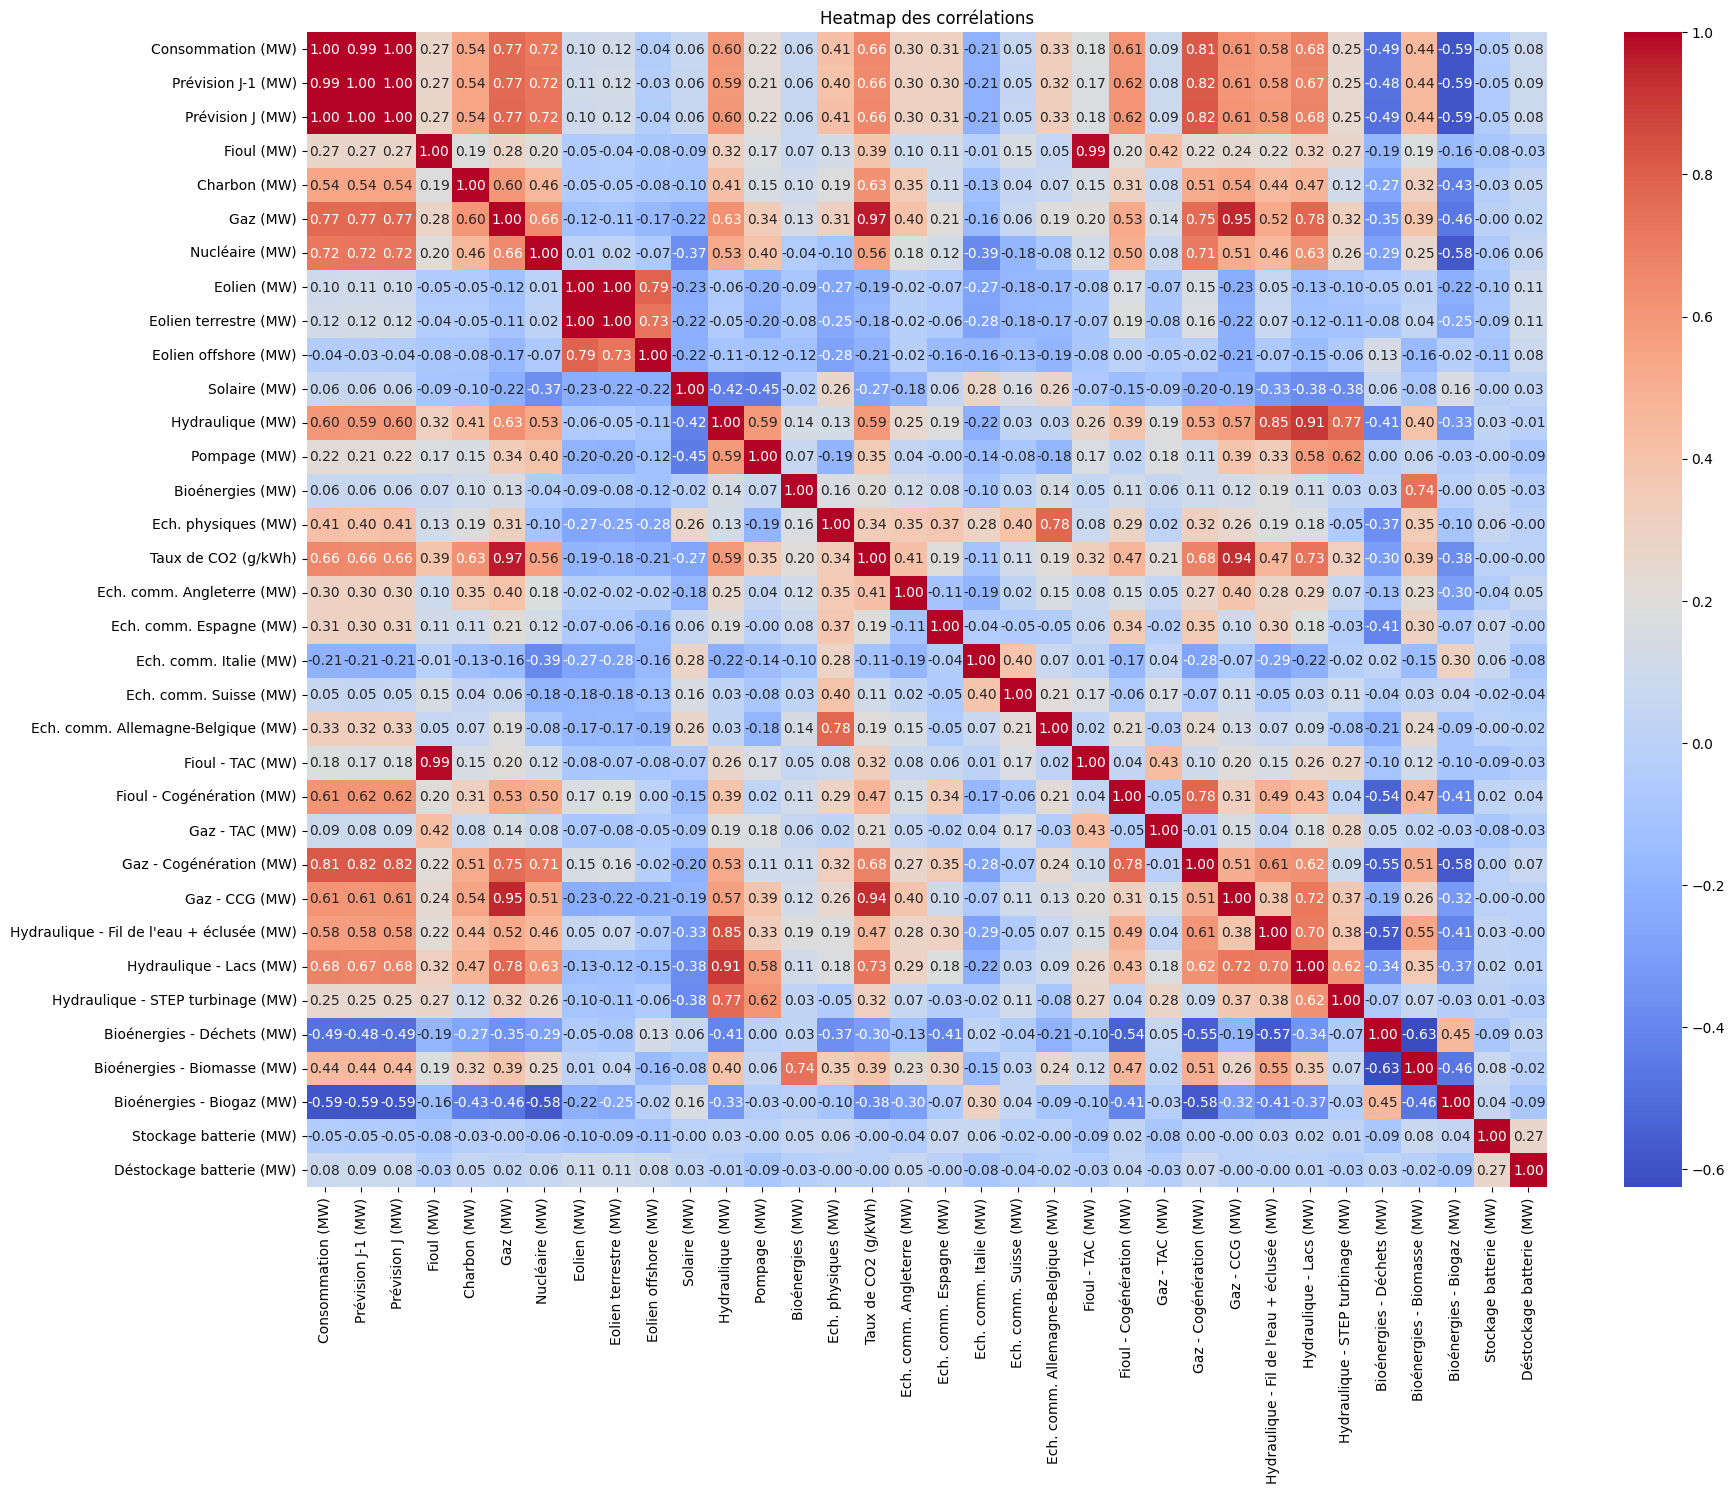

In [ ]:
corr = X.corr(numeric_only=True)
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap des corrélations")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def PCAResulat(x):
    # Séparation des colonnes
    object_columns_names = x.dtypes[x.dtypes == 'object'].index
    nbr_columns_names = x.dtypes[x.dtypes == 'float32'].index
    #la supprission des colonnes Date et Heure car il sont juste une repition de Date-Heure
    object_columns_names=object_columns_names.drop(['Date','Heure'])

    print(f"Colonnes numériques (int32): {len(nbr_columns_names)}")
    print(f"Colonnes object: {len(object_columns_names)}")
    
    # Sélection des données numériques
    df_nbr = x[nbr_columns_names]
    
    # Normalisation et PCA
    X_scaler = StandardScaler().fit_transform(df_nbr)
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_scaler)
    
    print(f"Après PCA: {X_pca.shape[1]} composantes")
    print(f"Variance expliquée: {sum(pca.explained_variance_ratio_):.3f}")
    
    # Créer le DataFrame des résultats PCA
    pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
    df_pca = pd.DataFrame(X_pca, columns=pca_columns,index=x.index)
    
    # Combiner avec les colonnes object
    if len(object_columns_names) > 0:
        df_combined = pd.concat([x[object_columns_names], df_pca], axis=1)
    else:
        df_combined = df_pca
    print(df_pca)
    return df_combined, pca


# Utilisation
df_combined, pca_model = PCAResulat(X)
print(f"DataFrame combiné shape: {df_combined.shape}")


Colonnes numériques (int32): 33
Colonnes object: 1
Après PCA: 18 composantes
Variance expliquée: 0.959
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.143239  2.659281 -2.404596  0.195275  0.579397  0.687248 -1.543194   
1      0.113382  2.602227 -2.484010  0.405306  0.392602  0.797331 -1.719316   
2      0.017909  2.644501 -2.435760  0.396419  0.482803  0.893380 -1.721670   
3     -0.244520  2.516895 -2.391570  0.520520  0.344090  1.006839 -1.493207   
4     -0.578905  2.903366 -2.233662  0.151723  0.395798  0.895249 -1.351877   
...         ...       ...       ...       ...       ...       ...       ...   
30116 -0.519743  1.073101  1.266303 -1.098528  0.240846  1.533630 -1.498020   
30117 -0.248883  1.012078  1.663636 -1.234543  0.405174  1.497838 -1.310591   
30118  1.889788  1.897340  3.126467 -1.912359  1.285884  1.065420  2.040915   
30119  1.896881  2.000614  3.145297 -1.749212  1.191093  1.037445  1.970343   
30120  1.319420  2.322173  3

In [ ]:
Y=y.rename('target')
df_final = pd.concat([Y, df_combined], axis=1)
df_final

,target,Date - Heure,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,48377.0,2025-02-22T02:00:00+01:00,0.143239,2.659281,-2.404596,0.195275,0.579397,0.687248,-1.543194,0.035416,0.139276,0.266204,1.614249,-0.985094,0.712656,0.563392,0.217936,0.239000,0.877051,0.410458
1,48573.0,2025-02-22T02:15:00+01:00,0.113382,2.602227,-2.484010,0.405306,0.392602,0.797331,-1.719316,-0.735507,0.177739,0.173844,1.609473,-0.555538,0.805018,-0.109487,-0.069860,0.208529,0.835765,0.594547
2,47344.0,2025-02-22T02:30:00+01:00,0.017909,2.644501,-2.435760,0.396419,0.482803,0.893380,-1.721670,-0.628377,0.103902,0.185749,1.618051,-0.621376,0.762022,-0.033396,-0.064826,0.254203,0.847577,0.606951
3,46148.0,2025-02-22T03:00:00+01:00,-0.244520,2.516895,-2.391570,0.520520,0.344090,1.006839,-1.493207,-0.623699,-0.058259,0.267655,1.284781,-1.057505,0.618819,-0.070943,-0.545313,0.400507,0.894200,0.709663
4,43554.0,2025-02-22T04:15:00+01:00,-0.578905,2.903366,-2.233662,0.151723,0.395798,0.895249,-1.351877,2.584462,0.104681,-0.239385,0.689746,-1.277472,0.621477,-1.128363,-1.149608,0.769501,0.772338,1.156727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30116,44007.0,2025-11-09T16:45:00+01:00,-0.519743,1.073101,1.266303,-1.098528,0.240846,1.533630,-1.498020,0.059636,-0.030805,-1.192661,0.446730,-0.078574,-0.025419,-0.050137,1.578276,0.471049,0.084667,-0.695353
30117,44292.0,2025-11-09T17:00:00+01:00,-0.248883,1.012078,1.663636,-1.234543,0.405174,1.497838,-1.310591,-0.012403,0.249494,-1.159424,0.235689,-0.072794,-0.063502,-0.135800,1.485137,0.517763,0.274333,-0.578867
30118,51970.0,2025-11-09T19:00:00+01:00,1.889788,1.897340,3.126467,-1.912359,1.285884,1.065420,2.040915,6.556504,1.516892,-2.549710,-0.409846,0.620262,-0.539256,-0.785088,0.700413,0.392072,0.621933,-0.485302
30119,51885.0,2025-11-09T19:15:00+01:00,1.896881,2.000614,3.145297,-1.749212,1.191093,1.037445,1.970343,5.645269,1.633803,-2.360120,-0.459745,0.685165,-0.552181,-0.857766,0.584619,0.416702,0.630572,-0.285768


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30031 entries, 0 to 30120
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        30031 non-null  float32
 1   Date - Heure  30031 non-null  object 
 2   PC1           30031 non-null  float32
 3   PC2           30031 non-null  float32
 4   PC3           30031 non-null  float32
 5   PC4           30031 non-null  float32
 6   PC5           30031 non-null  float32
 7   PC6           30031 non-null  float32
 8   PC7           30031 non-null  float32
 9   PC8           30031 non-null  float32
 10  PC9           30031 non-null  float32
 11  PC10          30031 non-null  float32
 12  PC11          30031 non-null  float32
 13  PC12          30031 non-null  float32
 14  PC13          30031 non-null  float32
 15  PC14          30031 non-null  float32
 16  PC15          30031 non-null  float32
 17  PC16          30031 non-null  float32
 18  PC17          30031 non-null  f

In [ ]:
df_final['Date - Heure'] = pd.to_datetime(df_final['Date - Heure'], utc=True)
df_final['Date - Heure'] = df_final['Date - Heure'].dt.tz_convert('Etc/GMT-1') #Etc/GMT-1 correspond à UTC+1

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30031 entries, 0 to 30120
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype                    
---  ------        --------------  -----                    
 0   target        30031 non-null  float32                  
 1   Date - Heure  30031 non-null  datetime64[ns, Etc/GMT-1]
 2   PC1           30031 non-null  float32                  
 3   PC2           30031 non-null  float32                  
 4   PC3           30031 non-null  float32                  
 5   PC4           30031 non-null  float32                  
 6   PC5           30031 non-null  float32                  
 7   PC6           30031 non-null  float32                  
 8   PC7           30031 non-null  float32                  
 9   PC8           30031 non-null  float32                  
 10  PC9           30031 non-null  float32                  
 11  PC10          30031 non-null  float32                  
 12  PC11          30031 non-null  float32

In [ ]:
df_1h = df_final.resample('1H', on='Date - Heure').mean(numeric_only=True).reset_index()
df_1h

C:\Users\Abdessamad\AppData\Local\Temp\ipykernel_10160\4293817897.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_1h = df_final.resample('1H', on='Date - Heure').mean(numeric_only=True).reset_index()


,Date - Heure,target,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,2025-01-01 00:00:00+01:00,63073.75,2.683708,2.527678,-4.351144,1.245513,-1.904823,2.127563,0.651295,-0.435064,3.203647,1.811795,1.187174,-1.281321,1.030294,1.135519,-0.769524,-1.473181,-0.775974,-1.300386
1,2025-01-01 01:00:00+01:00,61134.25,2.363786,2.622998,-4.346766,1.464018,-1.677212,2.284911,0.627945,-0.784291,3.143848,1.850934,1.161143,-0.984703,1.001948,0.853805,-0.946282,-1.472887,-0.768523,-1.190611
2,2025-01-01 02:00:00+01:00,60263.25,2.101357,2.813057,-4.608328,1.368074,-1.635131,2.152287,0.696974,1.001405,3.212907,1.756173,1.044652,-0.851141,1.095220,0.378089,-1.136296,-1.369168,-0.799829,-1.012985
3,2025-01-01 03:00:00+01:00,57825.25,1.661769,2.861926,-4.704884,1.452045,-1.620451,2.224430,0.514473,0.917336,2.929824,2.124214,1.132284,-0.942621,1.100379,0.641918,-1.057827,-1.384718,-0.719964,-0.885121
4,2025-01-01 04:00:00+01:00,55917.25,1.380924,2.840476,-4.691097,1.810452,-1.776451,2.458706,0.275480,-0.772844,2.750864,2.217859,1.252380,-0.938471,1.074936,0.636222,-1.108327,-1.324353,-0.728960,-0.642940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7504,2025-11-09 16:00:00+01:00,43894.50,-0.851257,1.023527,0.427466,-0.966216,0.078379,1.350175,-1.602037,1.628622,0.013401,-1.455828,0.554261,0.577498,0.201004,-0.902407,1.275053,0.435169,-0.059242,-0.364755
7505,2025-11-09 17:00:00+01:00,45805.00,0.305087,1.323499,2.378398,-1.235066,0.564250,1.522834,-0.490994,0.299603,0.787586,-1.403238,-0.124019,0.095110,-0.294492,-0.362059,1.120287,0.573328,0.533953,-0.439688
7506,2025-11-09 18:00:00+01:00,50114.25,1.534902,1.585575,3.592335,-0.987547,0.649559,1.620523,0.838854,-0.836752,1.330799,-2.088353,-0.443395,0.564253,-0.669284,-0.679793,0.602581,0.484236,0.819045,-0.195257
7507,2025-11-09 19:00:00+01:00,51565.50,1.827443,1.972788,3.337934,-1.594043,1.104582,1.237854,1.820904,4.330050,1.521955,-2.303730,-0.502537,0.545773,-0.658522,-0.621690,0.629815,0.450298,0.771647,-0.327890


In [ ]:
df_1h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7509 entries, 0 to 7508
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype                    
---  ------        --------------  -----                    
 0   Date - Heure  7509 non-null   datetime64[ns, Etc/GMT-1]
 1   target        7508 non-null   float32                  
 2   PC1           7508 non-null   float32                  
 3   PC2           7508 non-null   float32                  
 4   PC3           7508 non-null   float32                  
 5   PC4           7508 non-null   float32                  
 6   PC5           7508 non-null   float32                  
 7   PC6           7508 non-null   float32                  
 8   PC7           7508 non-null   float32                  
 9   PC8           7508 non-null   float32                  
 10  PC9           7508 non-null   float32                  
 11  PC10          7508 non-null   float32                  
 12  PC11          7508 non-null   floa

In [ ]:
from sklearn.model_selection import train_test_split
# train,test=train_test_split(df_1h,test_size=0)
df_1h.to_csv("../../data/eco2mix_datatrain.csv")
# test.to_csv("../../data/eco2mix_datatest.csv")